In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../../../data/Data_Science_Listings'

In [3]:
df = pd.read_csv(f'{DATA_DIR}/Data_Scientist_Job_Listings_Data.csv')

In [4]:
df.head()

,source_id,original_record_id,original_job_posting_site,original_job_title,cleansed_job_title,original_company_name,original_industry,original_location_full,original_location_city,original_location_state,...,original_location_country,original_salary,cleansed_salary_min,cleansed_salary_max,cleansed_salary_avg,original_job_type,original_work_type,original_job_description1,original_job_description2,posting_date
0,1,0,INDEED,Data Scientist,data scientist,Driven Brands,NaN,"Benicia, CA",NaN,NaN,...,USA,NaN,NaN,NaN,NaN,Undefined,NaN,You’ll be working alongside a team of eight an...,We invite you to join us at Driven Brands!\r\n...,11/20/2022
1,1,1,INDEED,Business Analyst,analyst,Sabot Consulting,NaN,Remote,NaN,NaN,...,USA,$80 - $120 an hour,NaN,NaN,NaN,Undefined,NaN,Preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,11/20/2022
2,1,2,INDEED,IT Business Intelligence Developer (FT) Remote...,data analytics,Ballad Health,NaN,"Remote in Blountville, TN",NaN,NaN,...,USA,NaN,NaN,NaN,NaN,Undefined,NaN,Job Details Apply Save Print this job Email a…,Job Details\r\nApply\r\nSave\r\nPrint this job...,11/20/2022
3,1,3,INDEED,Data Engineer,data engineer,Longevity Holdings Inc.,NaN,"Remote in Minneapolis-Saint Paul, MN",NaN,NaN,...,USA,"$90,000 - $110,000 a year",90000.0,110000.0,100000.0,Undefined,NaN,Incorporate core data management competencies ...,Position: Data Engineer\r\nLocation: MN\r\nAs ...,11/20/2022
4,1,4,INDEED,Network Administrator/dba developer,na,WKI Kenworth,NaN,"Wichita, KS 67219",NaN,NaN,...,USA,"$50,000 - $70,000 a year",50000.0,70000.0,60000.0,Undefined,NaN,The Network Administrator provides 2nd level e...,Full Job Description\r\nThe Network Administra...,11/20/2022


In [23]:
df.columns

Index(['source_id', 'original_record_id', 'original_job_posting_site',
       'original_job_title', 'cleansed_job_title', 'original_company_name',
       'original_industry', 'original_location_full', 'original_location_city',
       'original_location_state', 'original_location_zipcode',
       'original_location_country', 'original_salary', 'cleansed_salary_min',
       'cleansed_salary_max', 'cleansed_salary_avg', 'original_job_type',
       'original_work_type', 'original_job_description1',
       'original_job_description2', 'posting_date'],
      dtype='object')

In [29]:
df.shape

(19868, 21)

## Salary data availability

In [105]:
df_salary_avg = df.dropna(subset=['cleansed_salary_avg', 'posting_date'])
df_salary_avg.shape

(1086, 21)

In [114]:
df_salary_avg['posting_date'] = pd.to_datetime(df_salary_avg['posting_date'], format='%m/%d/%Y')

C:\Users\Devin\AppData\Local\Temp\ipykernel_2504\517585812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary_avg['posting_date'] = pd.to_datetime(df_salary_avg['posting_date'], format='%m/%d/%Y')


In [115]:
df.dropna(subset=['cleansed_salary_avg']).shape

(1086, 21)

In [116]:
df.dropna(subset=['cleansed_salary_min']).shape

(1097, 21)

In [117]:
df_ds_salary_avg = df_salary_avg[df_salary_avg['cleansed_job_title'] == 'data scientist']
df_ds_salary_avg.shape

(359, 21)

Text(0.5, 1.0, 'Data Science Salaries Over Time')

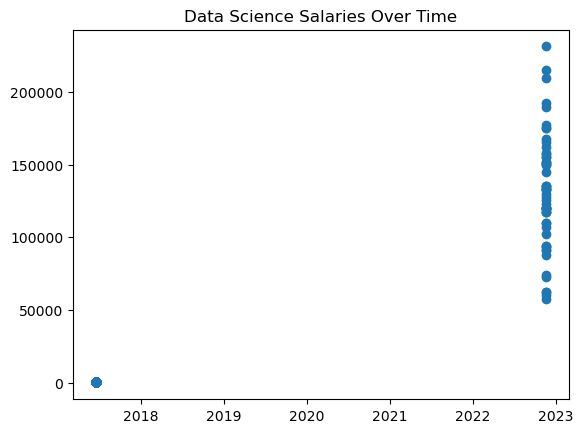

In [118]:
plt.scatter(df_ds_salary_avg['posting_date'], df_ds_salary_avg['cleansed_salary_avg'])
plt.title('Data Science Salaries Over Time')

In [120]:
df_salary_avg.shape

(1086, 21)

Text(0.5, 1.0, 'Data-related Job  Salaries Over Time')

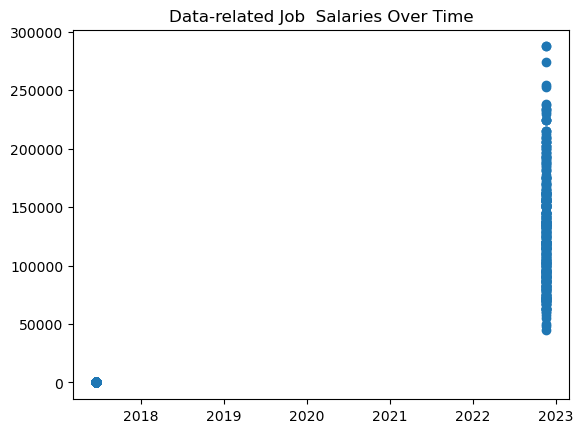

In [119]:
plt.scatter(df_salary_avg['posting_date'], df_salary_avg['cleansed_salary_avg'])
plt.title('Data-related Job  Salaries Over Time')

## Job title availability

In [35]:
df_job_title = df.dropna(subset=['cleansed_job_title'])

In [36]:
df_job_title.shape

(19868, 21)

In [41]:
df_job_title['cleansed_job_title'].value_counts()

cleansed_job_title
data scientist                    10461
na                                 6529
data analytics                      897
data engineer                       845
analyst                             458
machine learning engineer           245
director                            241
data scientist project manager       88
other scientist                      85
data modeler                         19
Name: count, dtype: int64

In [47]:
df_job_title = df_job_title[df_job_title['cleansed_job_title'] != 'na']

In [48]:
df_job_title.shape

(13339, 21)

In [49]:
df_job_title['cleansed_job_title'].value_counts()

cleansed_job_title
data scientist                    10461
data analytics                      897
data engineer                       845
analyst                             458
machine learning engineer           245
director                            241
data scientist project manager       88
other scientist                      85
data modeler                         19
Name: count, dtype: int64

## Job title availability with posting date

In [63]:
df_job_title_date = df.dropna(subset=['cleansed_job_title', 'posting_date'])

In [64]:
df_job_title_date = df_job_title_date[df_job_title_date['cleansed_job_title'] != 'na']

In [65]:
df_job_title_date.shape

(13339, 21)

#### Convert date string to date type

In [66]:
df_job_title_date['posting_date'].tolist()[0]

'11/20/2022'

In [67]:
df_job_title_date['posting_date'] = pd.to_datetime(df_job_title_date['posting_date'], format='%m/%d/%Y')

In [68]:
df_job_title_date['posting_date'].tolist()[0]

Timestamp('2022-11-20 00:00:00')

#### Explore job listing counts overtime

In [69]:
df_data_scientist = df_job_title_date[df_job_title_date['cleansed_job_title'] == 'data scientist']

In [70]:
df_data_scientist = df_data_scientist[['posting_date', 'cleansed_job_title']]

In [71]:
df_data_scientist.head()

,posting_date,cleansed_job_title
0,2022-11-20,data scientist
5,2022-11-20,data scientist
8,2022-11-20,data scientist
17,2022-11-20,data scientist
23,2022-11-20,data scientist


In [14]:
df_data_scientist.set_index('posting_date', inplace=True)
df_data_scientist_count_by_month = df_data_scientist.resample('M').size()

In [15]:
df_data_scientist_count_by_month = df_data_scientist_count_by_month.reset_index()

In [19]:
df_data_scientist_count_by_month.columns = ['month', 'count']
df_data_scientist_count_by_month

,month,count
0,2017-06-30,302
1,2017-07-31,0
2,2017-08-31,0
3,2017-09-30,0
4,2017-10-31,0
...,...,...
68,2023-02-28,0
69,2023-03-31,0
70,2023-04-30,0
71,2023-05-31,0


In [26]:
df_ds_count_by_month_clean = df_data_scientist_count_by_month[df_data_scientist_count_by_month['count'] != 0]
df_ds_count_by_month_clean

,month,count
0,2017-06-30,302
20,2019-02-28,837
21,2019-03-31,546
22,2019-04-30,830
23,2019-05-31,645
24,2019-06-30,774
25,2019-07-31,1815
26,2019-08-31,2727
27,2019-09-30,1637
28,2019-10-31,34


Text(0.5, 1.0, 'Data Science Job Listings Over Time')

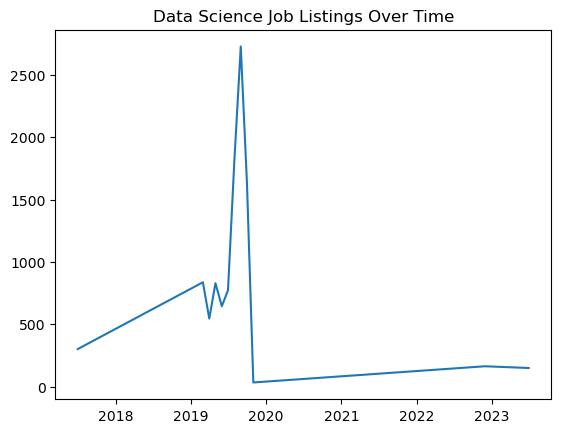

In [28]:
plt.plot(df_ds_count_by_month_clean['month'], df_ds_count_by_month_clean['count'])
plt.title('Data Science Job Listings Over Time')

#### Plot trend for all jobs in dataset over time

In [73]:
df_job_title_date_all = df_job_title_date
df_job_title_date_all.set_index('posting_date', inplace=True)
df_job_title_date_all = df_job_title_date_all.resample('M').size()
df_job_title_date_all = df_job_title_date_all.reset_index()
df_job_title_date_all.columns = ['month', 'count']
df_job_title_date_all

,month,count
0,2017-06-30,607
1,2017-07-31,0
2,2017-08-31,0
3,2017-09-30,0
4,2017-10-31,0
...,...,...
68,2023-02-28,0
69,2023-03-31,0
70,2023-04-30,0
71,2023-05-31,0


In [74]:
df_job_title_date_all = df_job_title_date_all[df_job_title_date_all['count'] != 0]
df_job_title_date_all

,month,count
0,2017-06-30,607
20,2019-02-28,844
21,2019-03-31,554
22,2019-04-30,841
23,2019-05-31,656
24,2019-06-30,788
25,2019-07-31,1837
26,2019-08-31,2783
27,2019-09-30,1662
28,2019-10-31,34


Text(0.5, 1.0, 'Data-related Job Listings Over Time')

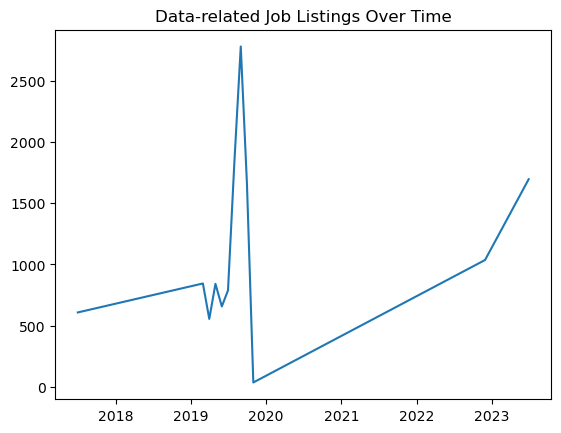

In [75]:
plt.plot(df_job_title_date_all['month'], df_job_title_date_all['count'])
plt.title('Data-related Job Listings Over Time')

## Availbility of location data

In [79]:
df.dropna(subset=['original_location_city']).shape

(666, 21)

In [80]:
df.dropna(subset=['original_location_state']).shape

(1403, 21)

#### Much more data in full locaiton, but inconsistent format & needs to be parsed into city/state/country

In [89]:
df_location_full = df.dropna(subset=['original_location_full'])
df_location_full.shape

(9836, 21)

In [84]:
df.dropna(subset=['original_location_full'])['original_location_full'].sample(10)

16535        Ahmedabad, Gujarat, India
11572                   Washington, DC
11220                       Dallas, TX
11597                       Peoria, IL
18858         Gurugram, Haryana, India
17900    Lucknow, Uttar Pradesh, India
11249              Fort Lauderdale, FL
12364      Hyderabad, Telangana, India
628                             Remote
12230    Bhopal, Madhya Pradesh, India
Name: original_location_full, dtype: object

#### Limited remote data, augmenting with description likely more fruitful

In [90]:
df_location_full_remote = df_location_full[df_location_full['original_location_full'].str.lower() == 'remote' ]
df_location_full_remote.shape

(283, 21)

In [92]:
df_location_full.sample(5)

,source_id,original_record_id,original_job_posting_site,original_job_title,cleansed_job_title,original_company_name,original_industry,original_location_full,original_location_city,original_location_state,...,original_location_country,original_salary,cleansed_salary_min,cleansed_salary_max,cleansed_salary_avg,original_job_type,original_work_type,original_job_description1,original_job_description2,posting_date
13149,4,3474396188,LINKEDIN,MS CRM Developer,na,eJAmerica,NaN,"Chennai, Tamil Nadu, India",NaN,NaN,...,INDIA,NaN,NaN,NaN,NaN,Full-time Mid-Senior level,Hybrid,About the job MS CRM DeveloperLocation: PAN In...,NaN,6/15/2023
15354,4,3476183925,LINKEDIN,Senior ReactJS Developer,na,EPAM Anywhere,NaN,"Patna, Bihar, India",NaN,NaN,...,INDIA,NaN,NaN,NaN,NaN,Full-time Mid-Senior level,Remote,About the job We would be happy to consider yo...,NaN,6/15/2023
18683,4,3474489963,LINKEDIN,Customer Service Specialist,na,Sukoon Solutions,NaN,"Ghaziabad, Uttar Pradesh, India",NaN,NaN,...,INDIA,NaN,NaN,NaN,NaN,Full-time,On-site,About the job Service Support Specialist/ Cust...,NaN,6/15/2023
13127,4,3467324969,LINKEDIN,Senior Threat Analyst,na,Optiv,NaN,"Bengaluru, Karnataka, India",NaN,NaN,...,INDIA,NaN,NaN,NaN,NaN,Full-time Mid-Senior level,On-site,"About the job At Optiv, we re on a mission to ...",NaN,6/15/2023
13406,4,3472552364,LINKEDIN,Scala Developer,na,Appzlogic,NaN,India,NaN,NaN,...,INDIA,NaN,NaN,NaN,NaN,Full-time,Remote,"About the job Job Description -Designing, crea...",NaN,6/15/2023
